<a href="https://colab.research.google.com/github/Soumaditya777/Cats-vs-Dogs-Classifier/blob/main/Cats_vs_Dogs_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:12<00:00, 236MB/s]
100% 1.06G/1.06G [00:12<00:00, 93.4MB/s]


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [12]:
#generators -- data ko batches me divide krdete hai so RAM me sirf ek batch load ho at a time
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
#Normalization-- pixel val must be 0-1 else results wont be good so 0-255 ko normalise krke 0-1 krte h
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [20]:
#Create CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 75ms/step - accuracy: 0.5534 - loss: 2.4099 - val_accuracy: 0.6584 - val_loss: 0.6233
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 84ms/step - accuracy: 0.6734 - loss: 0.6079 - val_accuracy: 0.6898 - val_loss: 0.5941
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.7222 - loss: 0.5529 - val_accuracy: 0.7650 - val_loss: 0.4993
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7700 - loss: 0.4746 - val_accuracy: 0.7424 - val_loss: 0.5132
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.8012 - loss: 0.4260 - val_accuracy: 0.7500 - val_loss: 0.5062
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.8281 - loss: 0.3682 - val_accuracy: 0.6842 - val_loss: 0.8231
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8570 - loss: 0.3187 - val_accuracy: 0.5816 - val_loss: 1.4518
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 83ms/step - accuracy: 0.8839 - loss: 0.2566 - 

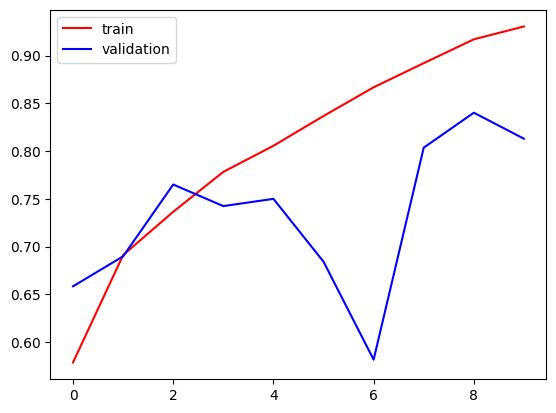

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

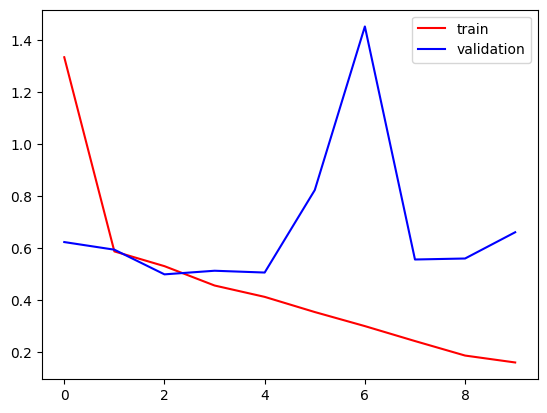

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting

#add more data
#Data Augmentation
#L1/L2 Regularization
#Dropout
#Batch Normalization

In [26]:
import cv2

In [30]:
test_img=cv2.imread('/content/dog.jpg')

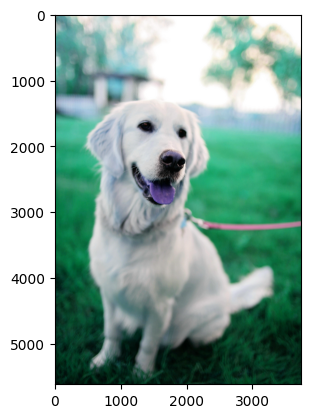

In [31]:
plt.imshow(test_img)

In [32]:
test_img.shape

(5616, 3744, 3)

In [33]:
test_img=cv2.resize(test_img,(256,256))

In [34]:
test_input=test_img.reshape((1,256,256,3))

In [35]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

In [38]:
# Interpret the prediction
prediction = model.predict(test_input)

if prediction>0.5:
  print('dog')
else:
  print('cat')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
dog
